# Training

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipynb.fs.full.Encoding import preprocessing
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style="darkgrid")

In [2]:
df = pd.read_csv('Data/Data_Cortex_Nuclear_Encoded.csv')

In [3]:
from sklearn.model_selection import train_test_split

trainset, testset = train_test_split(df, test_size=0.2, random_state=0)
print(trainset['Class'].value_counts())
print(testset['Class'].value_counts())

0.0    126
1.0    125
5.0    111
7.0    109
2.0    108
3.0    104
4.0    103
6.0     78
Name: Class, dtype: int64
4.0    32
3.0    31
6.0    27
2.0    27
7.0    26
1.0    25
5.0    24
0.0    24
Name: Class, dtype: int64


In [4]:
useless_columns = ['MouseID']

In [5]:
_, X_train, y_train, _ = preprocessing(trainset, useless_columns)
_, X_test, y_test, _ = preprocessing(testset, useless_columns)

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

In [7]:
preprocessor = make_pipeline(StandardScaler())

PCAPipeline = make_pipeline(preprocessor, PCA(n_components=2,random_state=0))

RandomPipeline = make_pipeline(preprocessor,RandomForestClassifier(random_state=0))
AdaPipeline = make_pipeline(preprocessor,AdaBoostClassifier(random_state=0))
SVMPipeline = make_pipeline(preprocessor,SVC(random_state=0,probability=True))
KNNPipeline = make_pipeline(preprocessor,KNeighborsClassifier())
LRPipeline = make_pipeline(preprocessor,LogisticRegression(solver='sag'))

In [8]:
PCA_df = pd.DataFrame(PCAPipeline.fit_transform(preprocessing(df, useless_columns)[1]))
PCA_df = pd.concat([PCA_df, df['Class']], axis=1)
PCA_df.head()

,0,1,Class
0,4.643039,5.456956,0.0
1,3.028412,5.515211,0.0
2,3.144482,5.717241,0.0
3,0.643212,4.072579,0.0
4,-0.406231,4.367141,0.0


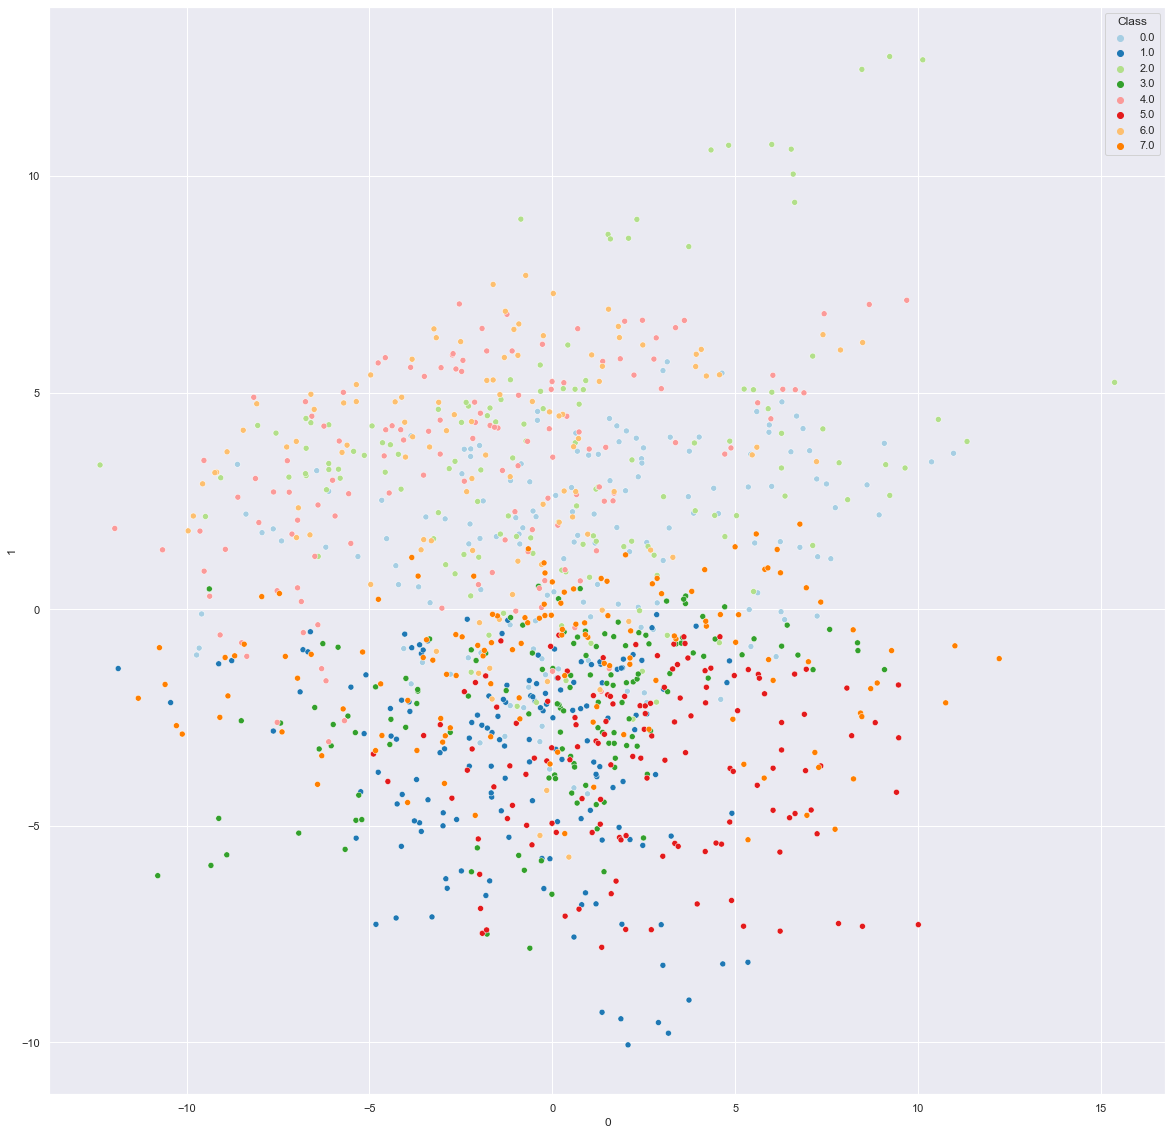

In [9]:
plt.figure(figsize=(20,20))
sns.scatterplot(x=0, y=1, hue='Class', data=PCA_df, palette=sns.color_palette("Paired", 8))
plt.show()

# Solving Classification problem

In [10]:
dict_of_models = {'RandomForest': RandomPipeline,
'AdaBoost': AdaPipeline,
'SVM': SVMPipeline,
'KNN': KNNPipeline,
'LR': LRPipeline}

In [11]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report, roc_curve
from sklearn.model_selection import learning_curve, cross_val_score, GridSearchCV

def evaluation(name, model, ax):
    model.fit(X_train, y_train)
    # calculating the probabilities
    y_pred_proba = model.predict_proba(X_test)

    # finding the predicted valued
    y_pred = np.argmax(y_pred_proba,axis=1)
    accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy = ', accuracy)
    print('_'*30)
    print(confusion_matrix(y_test,y_pred))
    print('_'*30)
    print(classification_report(y_test,y_pred))
    print('_'*30)
    
    N, train_score, val_score = learning_curve(
        model, X_train, y_train, 
        cv=4, scoring='accuracy', 
        train_sizes=np.linspace(0.1,1,20)
        )
    print(N, train_score, val_score)
    sns.lineplot(N, train_score.mean(axis=1), label='train score', ax=ax)
    sns.lineplot(N, val_score.mean(axis=1), label='validation score', ax=ax)
    ax.set_title(name)

    return accuracy

In [12]:
model_performance = {}

RandomForest
Accuracy =  1.0
______________________________
[[24  0  0  0  0  0  0  0]
 [ 0 25  0  0  0  0  0  0]
 [ 0  0 27  0  0  0  0  0]
 [ 0  0  0 31  0  0  0  0]
 [ 0  0  0  0 32  0  0  0]
 [ 0  0  0  0  0 24  0  0]
 [ 0  0  0  0  0  0 27  0]
 [ 0  0  0  0  0  0  0 26]]
______________________________
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        27
           3       1.00      1.00      1.00        31
           4       1.00      1.00      1.00        32
           5       1.00      1.00      1.00        24
           6       1.00      1.00      1.00        27
           7       1.00      1.00      1.00        26

    accuracy                           1.00       216
   macro avg       1.00      1.00      1.00       216
weighted avg       1.00      1.00      1.00       216

______________________________
[ 64  95 1

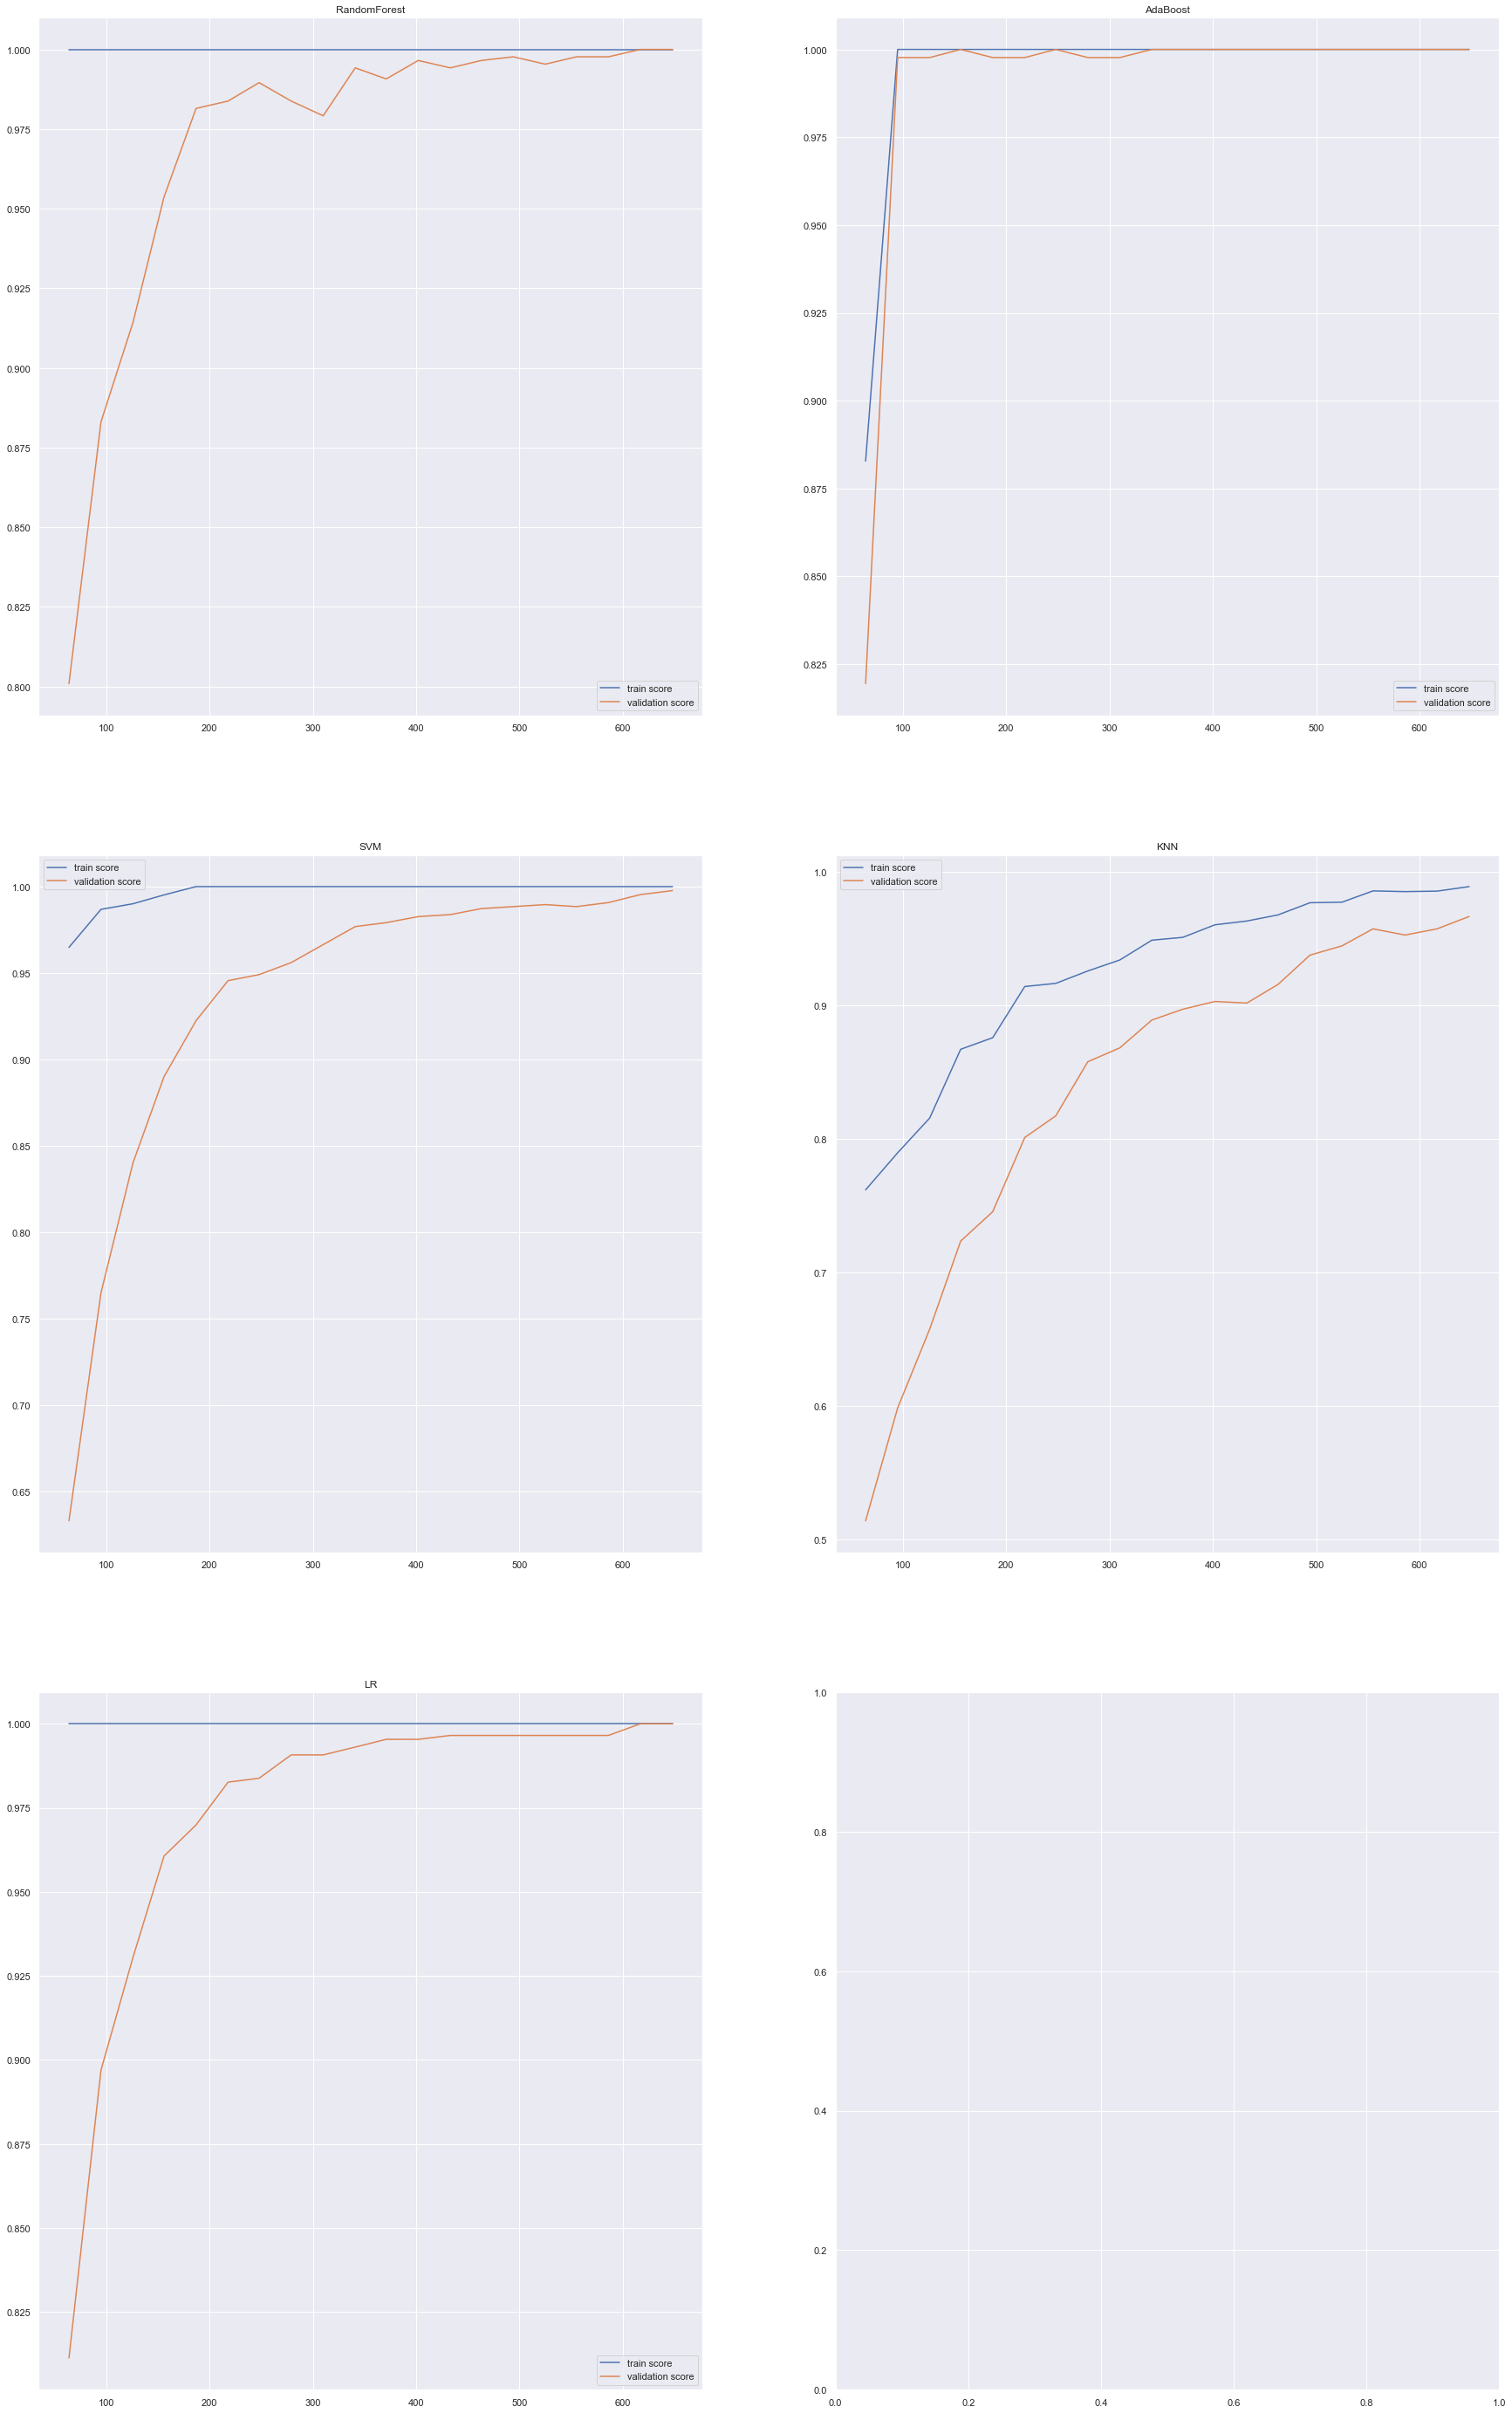

In [13]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(30, 50))

for (name, model), ax in zip(dict_of_models.items(), axes.flatten()):
    print('='*30)
    print(name)
    print('='*30)

    model_performance[name] = evaluation(name, model, ax)

In [14]:
model_performance

{'RandomForest': 1.0,
 'AdaBoost': 1.0,
 'SVM': 1.0,
 'KNN': 0.9768518518518519,
 'LR': 1.0}